In [1]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)

In [2]:
path.ls()

(#2) [Path('/home/avgdev/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images')]

In [3]:
(path/"images").ls()

(#7393) [Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/havanese_59.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/basset_hound_44.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/great_pyrenees_163.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/Persian_43.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/havanese_70.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/leonberger_122.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_44.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_195.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_17.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/Maine_Coon_144.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/basset_hound_191.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/chihuahua_160.jpg'),Path('/home/avgdev/.fastai/data/oxford-iiit-pet

In [4]:
fname = (path/"images").ls()[0]
fname

Path('/home/avgdev/.fastai/data/oxford-iiit-pet/images/havanese_59.jpg')

In [5]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['havanese']

In [6]:
from fastai.vision.augment import aug_transforms
from fastai.vision.augment import Resize
from fastai.data.transforms import RegexLabeller
from fastai.data.transforms import RandomSplitter

pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(
        r'(.+)_\d+.jpg$'
    ), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = pets.dataloaders(path/'images')

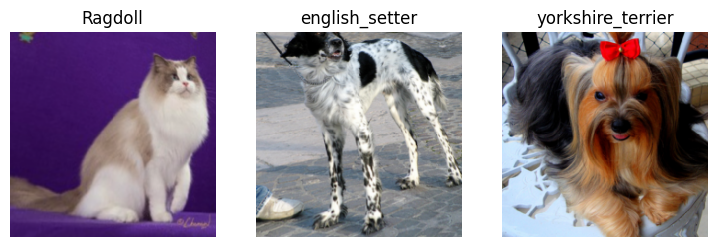

In [7]:
dls.show_batch(nrows=1, ncols=3)

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

learn.fine_tune(2)

/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.541849,0.306733,0.099459,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.513196,0.254208,0.084574,00:45
1,0.329477,0.186577,0.061570,00:44


In [9]:
x, y = dls.one_batch()

In [10]:
x

TensorImage([[[[-1.6109, -1.5787, -1.5426,  ..., -1.1480, -1.1393, -1.1561],
               [-1.5733, -1.5346, -1.5266,  ..., -1.1544, -1.1577, -1.1641],
               [-1.6152, -1.6038, -1.6210,  ..., -1.2130, -1.2226, -1.2325],
               ...,
               [-0.8916, -0.9768, -0.9625,  ..., -1.2965, -1.2499, -1.2658],
               [-0.9230, -0.9471, -0.9756,  ..., -1.2814, -1.2562, -1.2475],
               [-0.9237, -1.0066, -1.0344,  ..., -1.2596, -1.2698, -1.2728]],

              [[-1.5330, -1.5145, -1.4877,  ..., -1.1561, -1.1533, -1.1670],
               [-1.4972, -1.4851, -1.4794,  ..., -1.1535, -1.1533, -1.1572],
               [-1.5376, -1.5209, -1.5305,  ..., -1.1964, -1.2061, -1.2163],
               ...,
               [-1.2319, -1.3227, -1.2971,  ..., -1.4492, -1.4250, -1.4371],
               [-1.2825, -1.3088, -1.3258,  ..., -1.4301, -1.4074, -1.4088],
               [-1.2838, -1.3478, -1.3730,  ..., -1.4065, -1.4177, -1.4347]],

              [[-1.3817, -1.3798

In [11]:
y

TensorCategory([15, 25, 13, 16, 15, 34, 22, 19, 28, 26, 16,  8, 19,  4, 15,  2,
                13, 36,  4, 20, 31, 32, 10,  8, 22, 11, 22, 18, 14, 22, 27, 12,
                 0, 12, 21, 17, 23, 33,  9, 32, 32, 20, 15, 22, 32, 28, 20, 13,
                22,  6, 16, 22,  3, 32, 32, 22,  4, 17,  3, 22, 17, 14,  6, 30],
               device='cuda:0')

In [13]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

tensor([2.3944e-05, 2.0276e-05, 1.7417e-06, 9.8178e-06, 2.3354e-06, 1.0860e-05,
        1.6865e-06, 1.0858e-06, 8.6323e-07, 1.2433e-05, 5.4661e-07, 7.2533e-07,
        1.2198e-05, 7.5756e-05, 4.3409e-04, 9.9915e-01, 1.8788e-06, 4.1171e-06,
        3.9116e-06, 9.6051e-06, 1.1112e-04, 1.4744e-05, 1.2405e-06, 2.5926e-06,
        2.3317e-06, 9.2331e-07, 8.2413e-06, 1.0537e-07, 6.8053e-07, 3.8069e-07,
        4.8211e-06, 9.8607e-07, 4.1205e-08, 1.1727e-05, 3.9224e-05, 1.7094e-06,
        2.1775e-05])

In [14]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

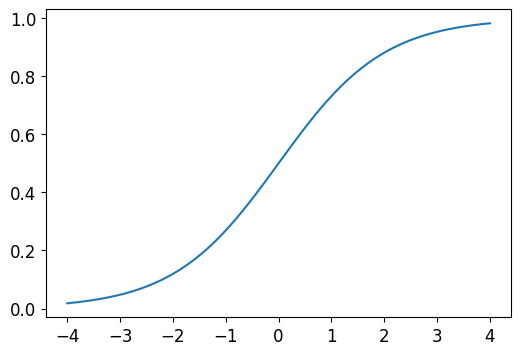

In [19]:
from fastbook import *
plot_function(torch.sigmoid, min=-4,max=4)

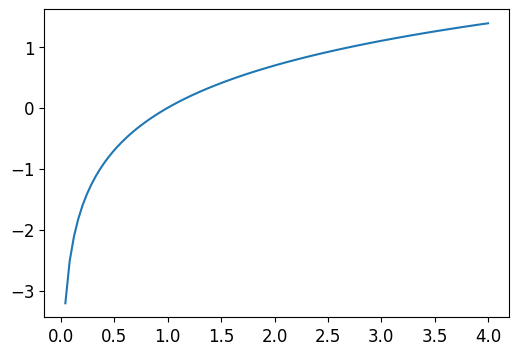

In [20]:
plot_function(torch.log, min=0,max=4)

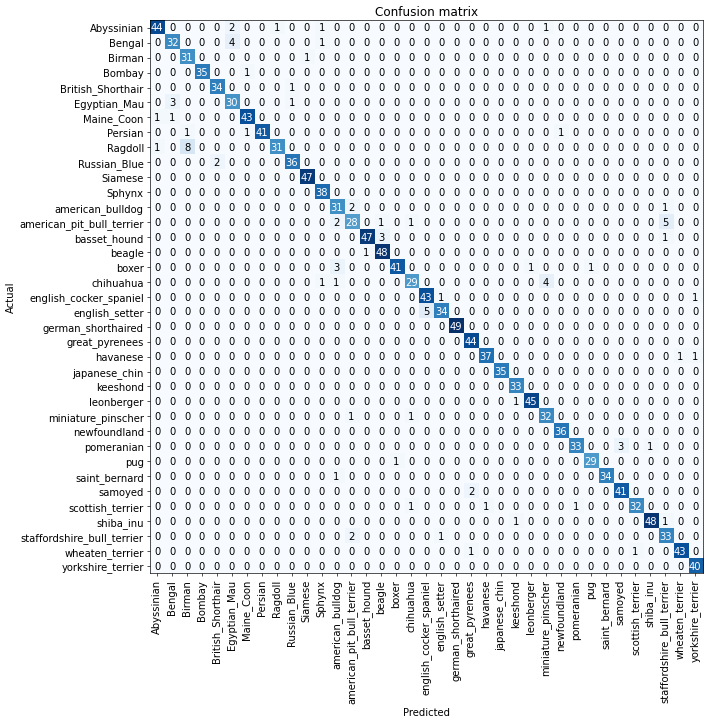

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:

interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', np.int64(8)),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', np.int64(5)),
 ('english_setter', 'english_cocker_spaniel', np.int64(5))]

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,2.836274,3.885098,0.456022,00:35


epoch,train_loss,valid_loss,error_rate,time
0,3.682309,2.317157,0.694181,00:45


/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


ValueError: not enough values to unpack (expected 2, got 1)

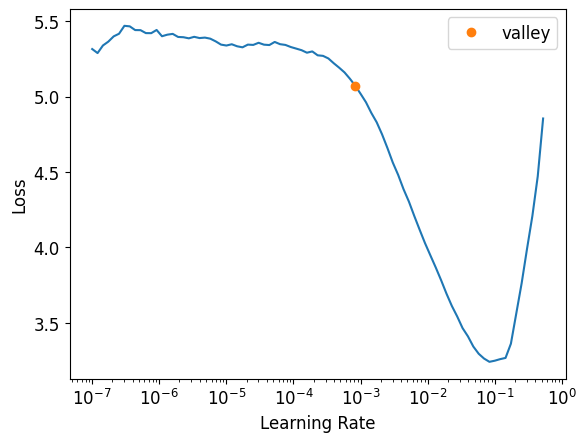

In [24]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

lr_min, lr_steep = learn.lr_find()

In [25]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

NameError: name 'lr_min' is not defined

In [26]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.290148,0.277588,0.095399,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.564261,0.388692,0.127876,00:45
1,0.348673,0.188668,0.060893,00:45


In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.141286,0.296885,0.102842,00:34
1,0.531583,0.210107,0.074425,00:35
2,0.350724,0.186301,0.062923,00:35


In [28]:
learn.unfreeze()

SuggestedLRs(valley=2.75422871709452e-06)

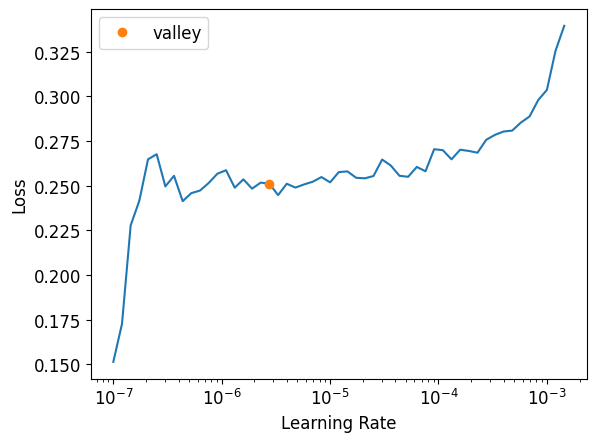

In [29]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(6, lr_max=2.75e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.264827,0.184444,0.061570,00:45
1,0.248233,0.174188,0.058187,00:45
2,0.249108,0.173682,0.055480,00:45
3,0.257592,0.169865,0.055480,00:45
4,0.232815,0.168357,0.055480,00:45
5,0.241832,0.169021,0.057510,00:45


In [31]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.167041,0.244395,0.079161,00:34
1,0.542514,0.215192,0.075101,00:35
2,0.340831,0.182170,0.063599,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.269873,0.176887,0.061570,00:45
1,0.253103,0.170903,0.056157,00:45
2,0.233260,0.158821,0.055480,00:45
3,0.216931,0.152646,0.048714,00:45
4,0.200813,0.148188,0.050068,00:46
5,0.186301,0.146505,0.050744,00:45
6,0.163755,0.140485,0.046685,00:45
7,0.154314,0.139038,0.045332,00:45
8,0.133592,0.139699,0.045332,00:45
9,0.139861,0.138563,0.046008,00:46


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

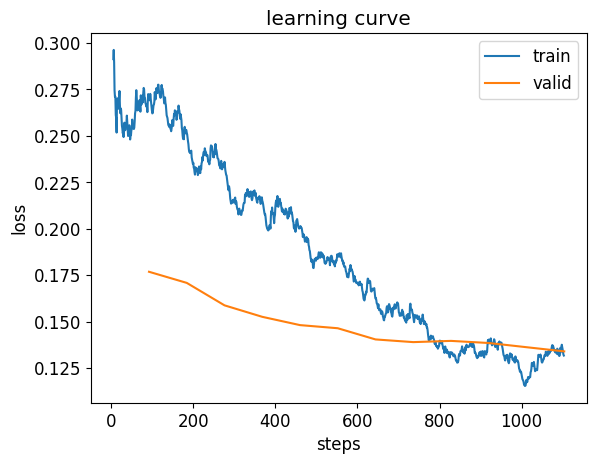

In [32]:
learn.recorder.plot_loss()

In [33]:
from fastai.callback.fp16 import *

learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()

learn.fine_tune(6, freeze_epochs=3)

/home/avgdev/code/avg-dev/projects/ai/fastai/.venv/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/avgdev/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 59.6MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.294765,0.426507,0.125846,00:32
1,0.874451,0.258012,0.092693,00:33
2,0.566382,0.266792,0.085250,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.286527,0.163477,0.058187,00:40
1,0.257161,0.179554,0.058187,00:40
2,0.216780,0.194386,0.057510,00:40
3,0.140649,0.161921,0.042625,00:40
4,0.101125,0.139009,0.042625,00:41
5,0.063147,0.137891,0.038566,00:40
